# Differentiating the PPG signal
In this tutorial we will learn how to differentiate physiological signals.

Our **objectives** are to:
- Apply [SciPy](https://docs.scipy.org/doc/scipy/index.html) functions for differentiating signals.
- View typical shapes of the first and second derivatives of PPG signals.

<div class="alert alert-block alert-warning"><p><b>Context:</b> Differentiating the PPG signal is a key step in identifying fiducial points on PPG pulse waves.</p></div>

---
## Setup

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [ ]:
# Import packages
import sys
from pathlib import Path
!pip install wfdb==4.0.0
import wfdb

In [3]:
# The name of the MIMIC-IV Waveform Database on PhysioNet
database_name = 'mimic4wdb/0.1.0'

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

# Segment 3 and 8 are helpful
rel_segment_n = 8 
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

---
## Extract one minute of PPG signal from this segment

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [5]:
# time since the start of the segment at which to begin extracting data
start_seconds = 100 
no_seconds_to_load = 5

segment_metadata = wfdb.rdheader(record_name=rel_segment_name,
                                 pn_dir=rel_segment_dir) 
print(f"Metadata loaded from segment: {rel_segment_name}")

fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs*(start_seconds + no_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir) 

print(f"{no_seconds_to_load} seconds of data extracted from: {rel_segment_name}")

for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs

print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Metadata loaded from segment: 88995377_0001
5 seconds of data extracted from: 88995377_0001
Extracted the PPG signal from column 4 of the matrix of waveform data.


---
## Filter the data

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [6]:
# package
import scipy.signal as sp

# filter cut-offs
lpf_cutoff = 0.7 # Hz
hpf_cutoff = 10 # Hz

# create filter
sos_ppg = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                    btype = 'bp',
                    analog = False,
                    output = 'sos',
                    fs = segment_data.fs)

w, h = sp.sosfreqz(sos_ppg, 2000, fs = fs)

# filter PPG
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

- Import the packages required to plot the signal: [matplotlib](https://matplotlib.org/stable/index.html) which is used to create plots, and [NumPy](https://numpy.org/) which is used to create a time vector in this example.

In [7]:
from matplotlib import pyplot as plt
import numpy as np

- Plot the original and the filtered PPG signal

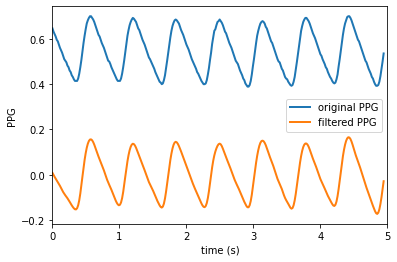

In [8]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt)) / segment_data.fs

ax.plot(t, ppg,
        linewidth=2.0,
        label = "original PPG")

ax.plot(t, ppg_filt,
        linewidth=2.0,
        label = "filtered PPG")

ax.set(xlim=(0, no_seconds_to_load))
plt.xlabel('time (s)')
plt.ylabel('PPG')

plt.legend()
plt.show()

- We will use the filtered signal instead of the original PPG from now on.

---
## Differentiate the PPG signal

- Differentiate it once and twice using the [Savitzky-Golay filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) function in SciPy

In [9]:
# Calculate first derivative
d1ppg = sp.savgol_filter(ppg_filt, 9, 5, deriv=1)

# Calculate second derivative
d2ppg = sp.savgol_filter(ppg_filt, 9, 5, deriv=2) 

<div class="alert alert-block alert-warning"><p><b>Resource:</b> Savitzky-Golay filtering, which is used here to calculate derivatives, is described in <a href="https://doi.org/10.1021/ac60214a047">this article</a>.</p></div>

<div class="alert alert-block alert-info"><p><b>Question:</b> Can you summarise how Savitzky-Golay filtering works? What are its advantages in physiological signal processing?</p></div>

---
## Plot the PPG and its derivatives

In [10]:
from matplotlib import pyplot as plt
import numpy as np

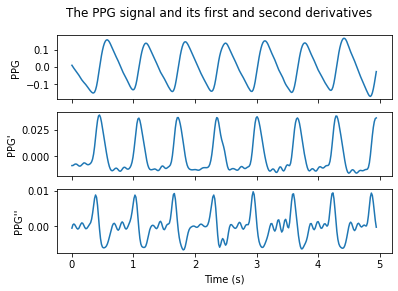

In [11]:
t = np.arange(0, len(ppg_filt))/segment_data.fs

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = True, sharey = False)
ax1.plot(t, ppg_filt)
ax1.set(xlabel = '', ylabel = 'PPG')

plt.suptitle('The PPG signal and its first and second derivatives')

ax2.plot(t, d1ppg)
ax2.set(xlabel = '',
        ylabel = 'PPG\'')

ax3.plot(t, d2ppg)
ax3.set(xlabel = 'Time (s)',
        ylabel = 'PPG\'\'')

plt.show()

<div class="alert alert-block alert-info"><p><b>Question:</b> How would the derivatives have looked different if the PPG signal hadn't been filtered before differentiation? <br> <b>Hint:</b> In the differentiation step above, try replacing 'ppg_filt' with 'ppg'.</p></div>

<div class="alert alert-block alert-info"><p><b>Question:</b> How would the derivatives have been different if the PPG signal had been filtered using different co-efficients?
    <br> <b>Hint:</b> Above, try replacing the relatively wide band-pass frequencies '[0.7, 10]' with '[0.8, 3]'. 
    <br> <b>Consider:</b> Which band-pass frequencies would be most suitable for pulse wave analysis? How about heart rate estimation?</p>
</div>

## Comparison with typical PPG pulse wave 

The figure below shows a typical PPG pulse wave recorded from a young, healthy subject.

![pic](https://upload.wikimedia.org/wikipedia/commons/b/b0/Photoplethysmogram_%28PPG%29_pulse_wave_fiducial_points.svg)

_Source: Charlton PH, [Photoplethysmogram (PPG) pulse wave fiducial points](https://commons.wikimedia.org/wiki/File:Photoplethysmogram_\(PPG\)_pulse_wave_fiducial_points.svg), Wikimedia Commons (CC BY 4.0)._

<div class="alert alert-block alert-info"><p><b>Question:</b> How does this pulse wave shape and derivatives compare to the shape of those obtained from MIMIC data above? What might explain the differences?</p></div>

<div class="alert alert-block alert-info"><p><b>Extension:</b> Try using 'rel_segment_n=3' above (i.e. analysing segment '82439920_0004'). How do the pulse waves in this signal compare? What might that tell us about this patient?</p></div>

<div class="alert alert-block alert-warning"><p><b>Further reading:</b> <a href="https://doi.org/10.1161/01.HYP.32.2.365">this article</a> provides further information on how age affects the shape of the PPG's second derivative.</p></div>